## 다중 모달 모듈형 RAG란 무엇인가?

In [1]:
import deeplake

dataset_path_llm = "hub://secufibre/drone_v2"
ds_llm = deeplake.load(dataset_path_llm)

/usr/local/lib/python3.11/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.17) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/secufibre/drone_v2



-

hub://secufibre/drone_v2 loaded successfully.



In [2]:
ds_llm

Dataset(path='hub://secufibre/drone_v2', tensors=['embedding', 'id', 'metadata', 'text'])

In [3]:
import json
import numpy as np
import pandas as pd

data_llm = {}

for tensor_name in ds_llm.tensors:
    tensor_data = ds_llm[tensor_name].numpy()
    if tensor_data.ndim > 1:
        data_llm[tensor_name] = [np.array(e).flatten().tolist() for e in tensor_data]
    else:
        if tensor_name == "text":
            data_llm[tensor_name] = [t.tobytes().decode('utf-8') if t else "" for t in tensor_data]
        else:
            data_llm[tensor_name] = tensor_data.tolist()

df_llm = pd.DataFrame(data_llm)
df_llm.head()

embedding  \
0  [-0.0027042930014431477, 0.007869635708630085,...   
1  [-0.014088690280914307, 0.014641465619206429, ...   
2  [-0.014408417046070099, -0.0004371690738480538...   
3  [-0.004417059011757374, -0.0012542684562504292...   
4  [-0.018791090697050095, 0.00625045457854867, 0...   

                                       id  \
0  [668b88ea-59f2-496b-86b0-35219acff460]   
1  [bb732a80-c435-416b-88df-51415d4b19ac]   
2  [fea05bc2-e717-4a11-8e32-1480be7231ad]   
3  [93a9d953-f1d4-4e17-8678-63562939a727]   
4  [1e4ffa59-1f44-4861-8386-1eb19358dbb7]   

                                            metadata  \
0  [{'file_path': '/storage2/RAG/003_RAG_index-ba...   
1  [{'file_path': '/storage2/RAG/003_RAG_index-ba...   
2  [{'file_path': '/storage2/RAG/003_RAG_index-ba...   
3  [{'file_path': '/storage2/RAG/003_RAG_index-ba...   
4  [{'file_path': '/storage2/RAG/003_RAG_index-ba...   

                                                text  
0  [High Energy Physics  Theory arXiv1804.06985 h...  
1  [Computer Science  Computer Vision and Pattern...  
2  [Computerized information extraction from imag...  
3  [These include the concept of scalespace  the ...  
4  [Also some of the learningbased methods develo...

In [4]:
from llama_index.core.schema import Document
from llama_index.core import VectorStoreIndex

df_llm['text'] = df_llm['text'].astype(str)
documents_llm = [Document(text=row['text'], doc_id=str(row['id'])) for _, row in df_llm.iterrows()]

vector_store = VectorStoreIndex.from_documents(documents_llm)

In [5]:
vector_query_engine_llm = vector_store.as_query_engine(
    similarity_top_k=2,
    temperature=0.1,
    num_output=1024
)

In [6]:
user_input = "How do drones identify a truck?"

In [7]:
import time
import textwrap

start_time = time.time()
response = vector_query_engine_llm.query(user_input)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Query execution time: {elapsed_time:.4f} seconds")
print(textwrap.fill(str(response), width=100))

Query execution time: 1.8388 seconds
Drones can identify a truck through visual detection and tracking using deep neural networks, which
provide a performance benchmark for the process.


In [8]:
import deeplake

dataset_path = 'hub://activeloop/visdrone-det-train'
ds = deeplake.load(dataset_path)

Opening dataset in read-only mode as you don't have write permissions.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/visdrone-det-train



hub://activeloop/visdrone-det-train loaded successfully.



In [9]:
ds.summary()

Dataset(path='hub://activeloop/visdrone-det-train', read_only=True, tensors=['boxes', 'images', 'labels'])

 tensor      htype                 shape               dtype  compression
 -------    -------               -------             -------  ------- 
  boxes      bbox            (6471, 1:914, 4)         float32   None   
 images      image     (6471, 360:1500, 480:2000, 3)   uint8    jpeg   
 labels   class_label          (6471, 1:914)          uint32    None   


In [11]:
ds.visualize()

HINT: Please forward the port - 56795 to your local machine, if you are running on the cloud.


 * Serving Flask app 'dataset_visualizer'
 * Debug mode: off


In [12]:
ds

Dataset(path='hub://activeloop/visdrone-det-train', read_only=True, tensors=['boxes', 'images', 'labels'])

In [13]:
import pandas as pd

df = pd.DataFrame(columns=['image', 'boxes', 'labels'])

for i, sample in enumerate(ds):
    df.loc[i, 'image'] = sample.images.tobytes()

    boxes_list = sample.boxes.numpy(aslist=True)
    df.loc[i, 'boxes'] = [box.tolist() for box in boxes_list]

    label_data = sample.labels.data()
    df.loc[i, 'labels'] = label_data['text']

df.head()

image  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                               boxes  \
0  [[1221.0, 84.0, 16.0, 33.0], [1235.0, 71.0, 18...   
1  [[351.0, 936.0, 305.0, 114.0], [0.0, 818.0, 22...   
2  [[699.0, 716.0, 26.0, 54.0], [600.0, 604.0, 22...   
3  [[417.0, 77.0, 57.0, 54.0], [387.0, 109.0, 31....   
4  [[794.0, 617.0, 97.0, 115.0], [803.0, 539.0, 7...   

                                              labels  
0  [pedestrian, pedestrian, tricycle, pedestrian,...  
1  [car, car, car, car, car, car, car, car, car, ...  
2  [truck, car, van, car, car, car, car, car, car...  
3  [ignored regions, ignored regions, car, car, c...  
4  [car, car, car, car, car, car, car, car, car, ...

In [39]:
labels_list = ds.labels.info['class_names']
labels_list

['ignored regions',
 'pedestrian',
 'people',
 'bicycle',
 'car',
 'van',
 'truck',
 'tricycle',
 'awning-tricycle',
 'bus',
 'motor',
 'others']

In [40]:
ind = 0
image = ds.images[ind].numpy()

In [42]:
image.shape

(765, 1360, 3)

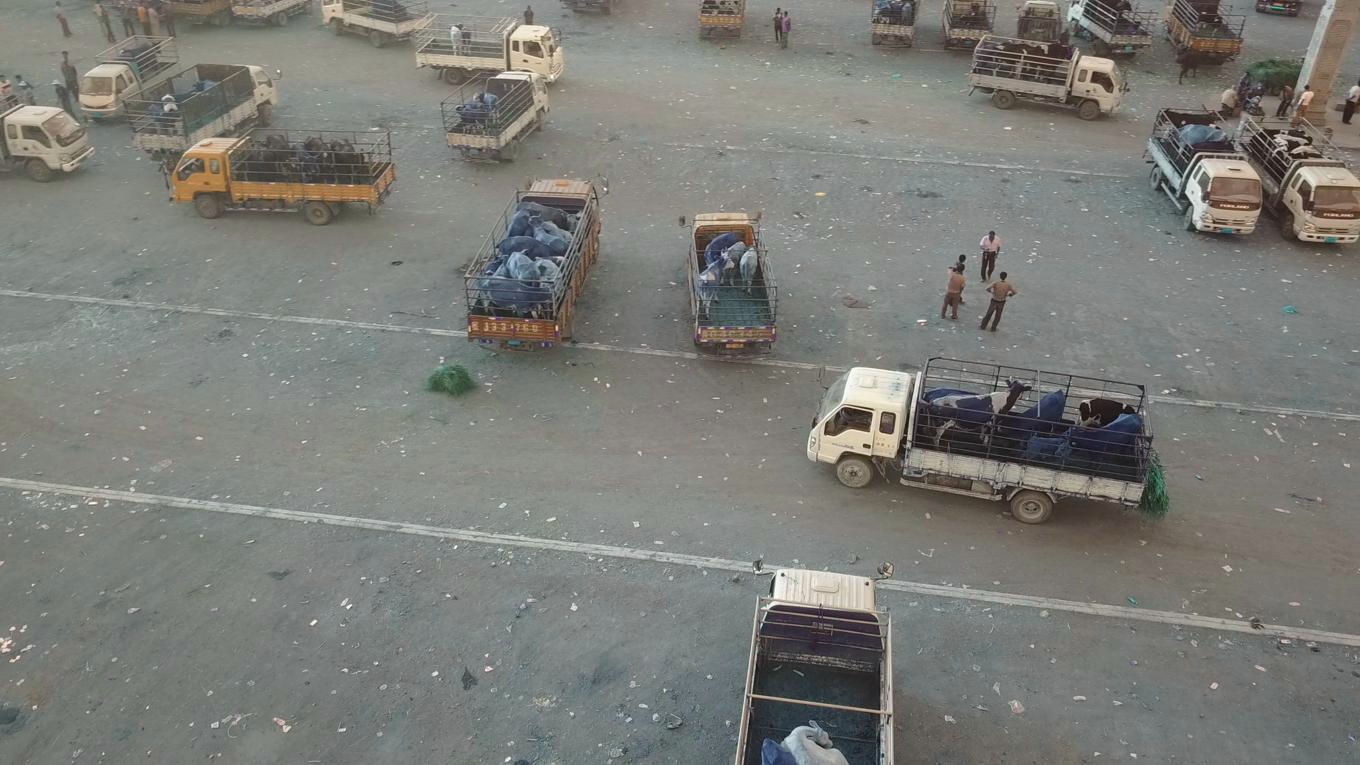

In [44]:
import cv2
import deeplake

from PIL import Image
from IPython.display import display

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img = Image.fromarray(image_rgb)
display(img)

In [48]:
labels = ds.labels[ind].data()
labels

{'value': array([1, 1, 7, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6,
        1, 1, 1, 1, 1, 1, 6, 6, 3, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 6, 6, 6], dtype=uint32),
 'text': ['pedestrian',
  'pedestrian',
  'tricycle',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'truck',
  'truck',
  'truck',
  'truck',
  'truck',
  'truck',
  'truck',
  'truck',
  'truck',
  'truck',
  'pedestrian',
  'truck',
  'truck',
  'truck',
  'truck',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'truck',
  'truck',
  'bicycle',
  'truck',
  'truck',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'pedestrian',
  'truck',
  'truck',
  'truck']}

In [49]:
values = labels['value']
text_labels = labels['text']

max_text_length = max(len(label) for label in text_labels)
print(f"{'Index':<10}{'Label':<{max_text_length + 2}}")
print('-' * (10 + max_text_length + 2))

for index, label in zip(values, text_labels):
    print(f"{index:<10}{label:<{max_text_length + 2}}")

Index     Label       
----------------------
1         pedestrian  
1         pedestrian  
7         tricycle    
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
6         truck       
6         truck       
6         truck       
6         truck       
6         truck       
6         truck       
6         truck       
6         truck       
6         truck       
6         truck       
1         pedestrian  
6         truck       
6         truck       
6         truck       
6         truck       
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
6         truck       
6         truck       
3         bicycle     
6         truck       
6         truck       
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         pedestrian  
1         p

In [50]:
ds.labels[ind].info['class_names']

['ignored regions',
 'pedestrian',
 'people',
 'bicycle',
 'car',
 'van',
 'truck',
 'tricycle',
 'awning-tricycle',
 'bus',
 'motor',
 'others']

In [51]:
from io import BytesIO
from PIL import Image, ImageDraw

def display_image_with_boxes(image_data, bboxes, labels, label_name, ind=0):
    image_bytes = BytesIO(image_data)
    img = Image.open(image_bytes)

    class_names = ds.labels[ind].info['class_names']

    if class_names is not None:
        try:
            label_index = class_names.index(label_name)
            relevant_indices = np.where(labels == label_index)[0]
        except ValueError:
            print(f"Warning: Label '{label_name}' not found. Displaying all boxes.")
            relevant_indices = range(len(labels))
    else:
        relevant_indices = []
    
    draw = ImageDraw.Draw(img)
    for idx, box in enumerate(bboxes):
        if idx in relevant_indices:
            x1, y1, w, h = box
            x2, y2 = x1 + w, y1 + h
            draw.rectangle([x1, y1, x2, y2], outline='red', width=2)
            draw.text((x1, y1), text_labels[idx], fill='red')
    
    save_path = "boxed_image.jpg"
    img.save(save_path)
    display(img)

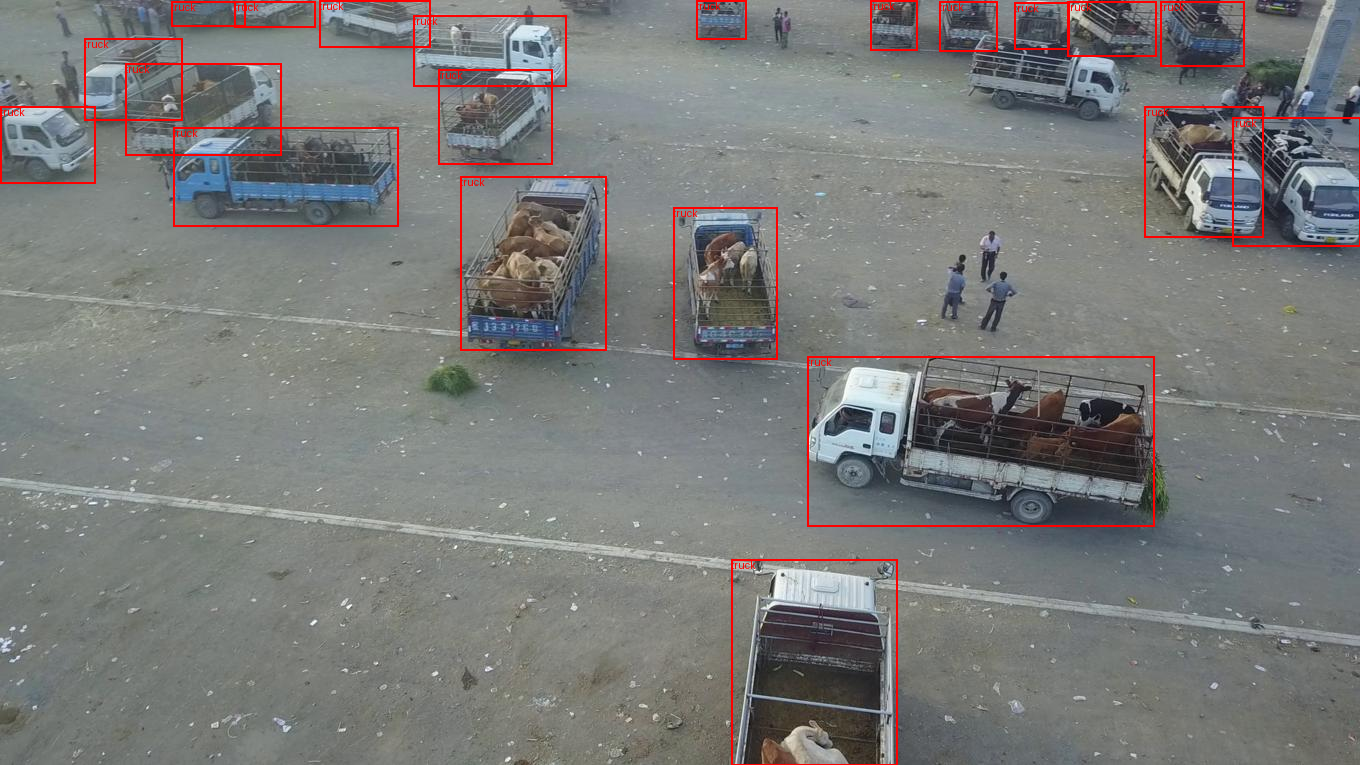

In [52]:
import io
from PIL import ImageDraw

labels = ds.labels[ind].data()['value']
image_data = ds.images[ind].tobytes()
bboxes = ds.boxes[ind].numpy()
ibox = "truck"

display_image_with_boxes(image_data, bboxes, labels, ibox)

In [53]:
df.head(5)

image  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                               boxes  \
0  [[1221.0, 84.0, 16.0, 33.0], [1235.0, 71.0, 18...   
1  [[351.0, 936.0, 305.0, 114.0], [0.0, 818.0, 22...   
2  [[699.0, 716.0, 26.0, 54.0], [600.0, 604.0, 22...   
3  [[417.0, 77.0, 57.0, 54.0], [387.0, 109.0, 31....   
4  [[794.0, 617.0, 97.0, 115.0], [803.0, 539.0, 7...   

                                              labels  
0  [pedestrian, pedestrian, tricycle, pedestrian,...  
1  [car, car, car, car, car, car, car, car, car, ...  
2  [truck, car, van, car, car, car, car, car, car...  
3  [ignored regions, ignored regions, car, car, c...  
4  [car, car, car, car, car, car, car, car, car, ...

In [54]:
df['doc_id'] = df.index.astype(str)

In [55]:
df.head(5)

image  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                               boxes  \
0  [[1221.0, 84.0, 16.0, 33.0], [1235.0, 71.0, 18...   
1  [[351.0, 936.0, 305.0, 114.0], [0.0, 818.0, 22...   
2  [[699.0, 716.0, 26.0, 54.0], [600.0, 604.0, 22...   
3  [[417.0, 77.0, 57.0, 54.0], [387.0, 109.0, 31....   
4  [[794.0, 617.0, 97.0, 115.0], [803.0, 539.0, 7...   

                                              labels doc_id  
0  [pedestrian, pedestrian, tricycle, pedestrian,...      0  
1  [car, car, car, car, car, car, car, car, car, ...      1  
2  [truck, car, van, car, car, car, car, car, car...      2  
3  [ignored regions, ignored regions, car, car, c...      3  
4  [car, car, car, car, car, car, car, car, car, ...      4

In [56]:
documents = []

In [57]:
for _, row in df.iterrows():
    text_labels = row['labels']
    text = " ".join(text_labels)
    document = Document(text=text, doc_id=row['doc_id'])
    documents.append(document)

In [58]:
from llama_index.core import GPTVectorStoreIndex

vector_store_index = GPTVectorStoreIndex.from_documents(documents)

In [59]:
vector_store_index.index_struct

IndexDict(index_id='8440b268-4b8d-4891-89c3-48dfd1304f82', summary=None, nodes_dict={'57161883-9088-4152-a771-92c44ea9f302': '57161883-9088-4152-a771-92c44ea9f302', 'cac7f1f7-235d-4ded-a9bf-56cf5b7bebb7': 'cac7f1f7-235d-4ded-a9bf-56cf5b7bebb7', 'f73d6566-70a9-4d37-96d9-c17490722c51': 'f73d6566-70a9-4d37-96d9-c17490722c51', '45a836de-98e6-46b5-a0ef-32bd66431ec2': '45a836de-98e6-46b5-a0ef-32bd66431ec2', 'f844c2e1-5af3-41ae-99f3-f09e869dfdd9': 'f844c2e1-5af3-41ae-99f3-f09e869dfdd9', 'b1217c49-3af4-4288-b1e4-036ba880e45f': 'b1217c49-3af4-4288-b1e4-036ba880e45f', 'be938eba-b167-4510-8acb-22dd240526a1': 'be938eba-b167-4510-8acb-22dd240526a1', '6bbd2434-5d67-4628-af6f-9db760e6969d': '6bbd2434-5d67-4628-af6f-9db760e6969d', '9e622523-c8cf-459c-8c62-e8256fea201e': '9e622523-c8cf-459c-8c62-e8256fea201e', '0fbbf029-99d1-4ae7-b45c-340ab8d8e7ee': '0fbbf029-99d1-4ae7-b45c-340ab8d8e7ee', '173221b9-6a68-45df-a702-850b8b1bd17b': '173221b9-6a68-45df-a702-850b8b1bd17b', '078daccb-a5df-4e50-9ce2-2378ac3caf

In [60]:
vector_query_engine = vector_store_index.as_query_engine(
    similarity_top_k=1,
    temperature=0.1,
    num_output=1024
)

In [61]:
start_time = time.time()
response = vector_query_engine.query(user_input)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Query execution time: {elapsed_time:.4f} seconds")
print(textwrap.fill(str(response), width=100))

Query execution time: 2.1124 seconds
Drones can identify a truck through various methods such as visual recognition using cameras,
sensors, and artificial intelligence algorithms.


In [65]:
response.source_nodes[0]

NodeWithScore(node=TextNode(id_='30418250-5db2-4bbe-9b6a-06d937bb7994', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='1183', node_type='4', metadata={}, hash='deed51f4fb8d6faa27c4192a81b7a0c958af72258447126f8ef4d0a32bdf416a')}, metadata_template='{key}: {value}', metadata_separator='\n', text='truck truck', mimetype='text/plain', start_char_idx=0, end_char_idx=11, metadata_seperator='\n', text_template='{metadata_str}\n\n{content}'), score=0.8321967283682106)

In [64]:
from itertools import groupby

def get_unique_words(text):
    text = text.lower().strip()
    words = text.split()
    unique_words = [word for word, _ in groupby(sorted(words))]
    return unique_words

for node in response.source_nodes:
    print(node.node_id)
    node_text = node.get_text()
    unique_words = get_unique_words(node_text)
    print("Unique Words in Node Text:", unique_words)

30418250-5db2-4bbe-9b6a-06d937bb7994
Unique Words in Node Text: ['truck']


In [68]:
ds[0]

/usr/local/lib/python3.11/dist-packages/deeplake/core/dataset/dataset.py:632: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


Dataset(path='hub://activeloop/visdrone-det-train', read_only=True, index=Index([0]), tensors=['boxes', 'images', 'labels'])

In [76]:
response.source_nodes[0].node.relationships.values()

dict_values([RelatedNodeInfo(node_id='1183', node_type='4', metadata={}, hash='deed51f4fb8d6faa27c4192a81b7a0c958af72258447126f8ef4d0a32bdf416a')])

In [77]:
for node in response.source_nodes:
    related_node_info = next(iter(node.node.relationships.values()))
    print(related_node_info)
    break

node_id='1183' node_type='4' metadata={} hash='deed51f4fb8d6faa27c4192a81b7a0c958af72258447126f8ef4d0a32bdf416a'


In [79]:
row_index = df[df['doc_id'] == '1183'].index[0]
row_index

1183

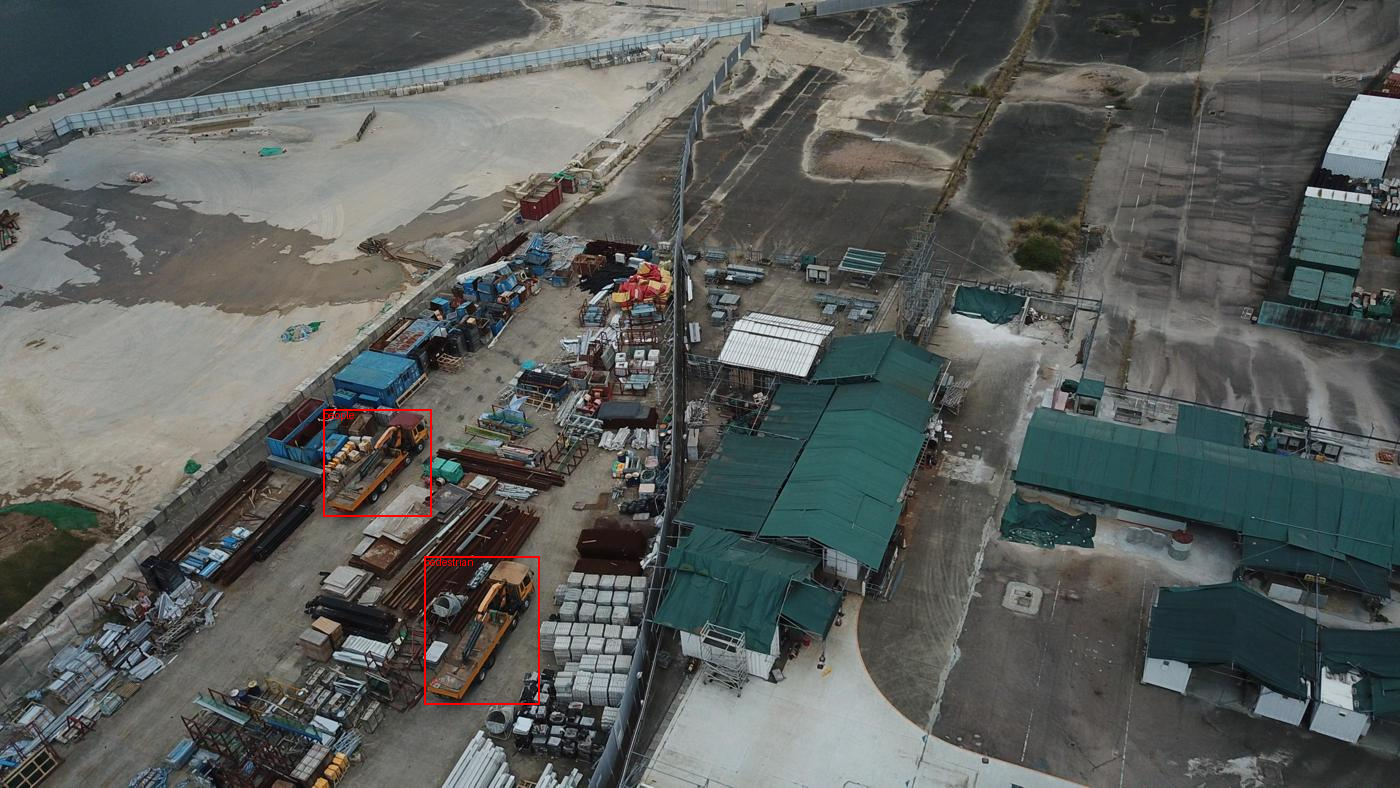

In [69]:
import io
from PIL import Image

def process_and_display(response, df, ds, unique_words):
    """Processes nodes, finds corresponding images in dataset, and displays them with bounding boxes.

    Args:
        response: The response object containing source nodes.
        df: The DataFrame with doc_id information.
        ds: The dataset containing images, labels, and boxes.
        unique_words: The list of unique words for filtering.
    """

    for i, sample in enumerate(ds):
        for node in response.source_nodes:
            related_node_info = next(iter(node.node.relationships.values()))
            original_doc_id = related_node_info.node_id

            try:
                row_index = df[df['doc_id'] == original_doc_id].index[0]
            except IndexError:
                continue  # Skip if doc_id not found in the DataFrame

            if i == row_index:
                image_bytes = io.BytesIO(sample.images.tobytes())
                img = Image.open(image_bytes)

                labels = ds.labels[i].data()['value']
                image_data = ds.images[i].tobytes()
                bboxes = ds.boxes[i].numpy()
                ibox = unique_words[0]  # class in image

                display_image_with_boxes(image_data, bboxes, labels, label_name=ibox)

# Assuming you have your 'response', 'df', 'ds', and 'unique_words' objects prepared:
process_and_display(response, df, ds, unique_words)

In [80]:
print(user_input)
print(textwrap.fill(str(response), 100))

How do drones identify a truck?
Drones can identify a truck through various methods such as visual recognition using cameras,
sensors, and artificial intelligence algorithms.


In [81]:
from PIL import Image

def display_source_image(image_path):
  try:
    with Image.open(image_path) as img:
        display(img)
  except FileNotFoundError:
    print("Error: The image file was not found at the specified path.")
  except Exception as e:  # Catch other potential errors
    print(f"Error loading image: {e}")

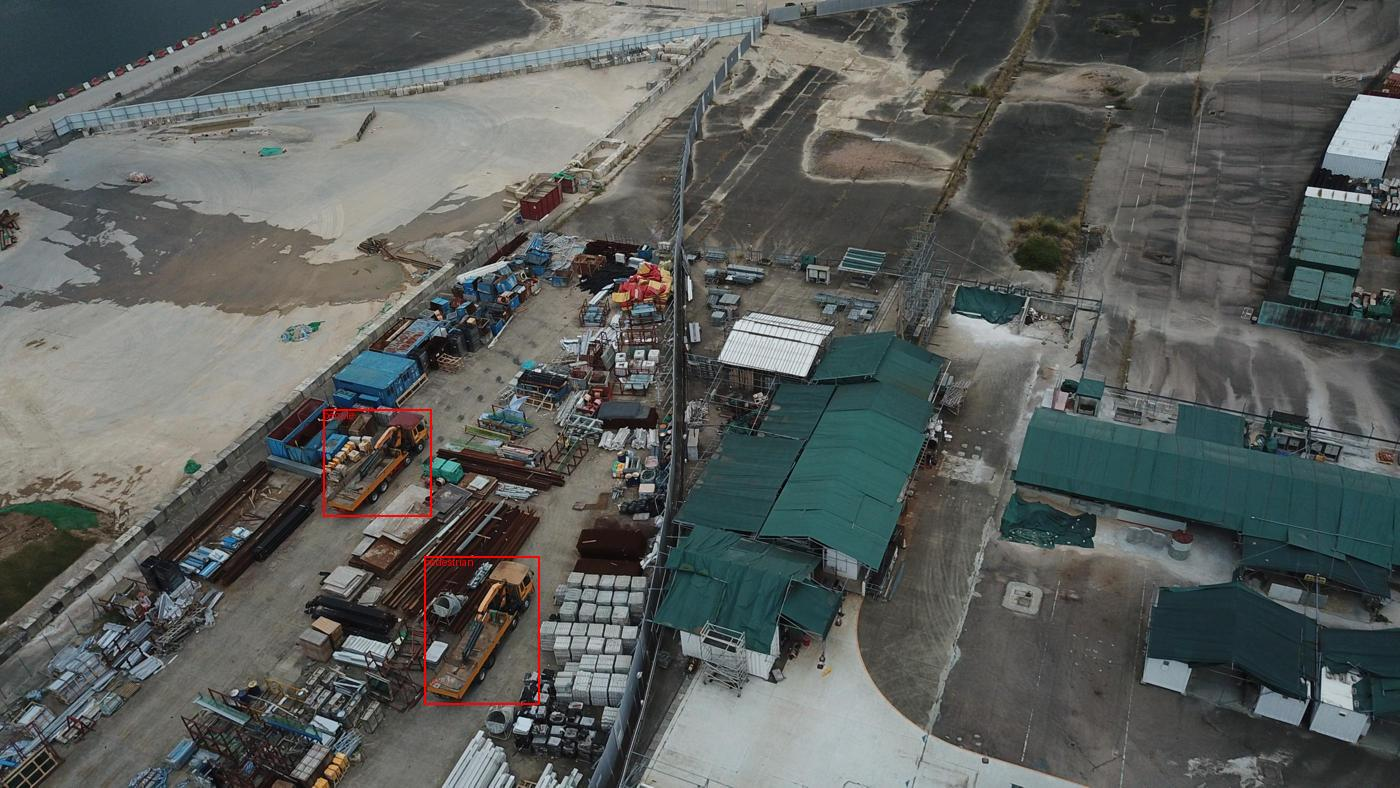

In [82]:
image_path = "./data/boxed_image.jpg"
display_source_image(image_path)

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

def calculate_cosine_similarity_with_embeddings(text1, text2):
    embeddings1 = model.encode(text1)
    embeddings2 = model.encode(text2)
    similarity = cosine_similarity([embeddings1], [embeddings2])
    return similarity[0][0]

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [84]:
llm_similarity_score = calculate_cosine_similarity_with_embeddings(user_input, str(response))
print(user_input)
print(response)
print(f"Cosine Similarity Score: {llm_similarity_score:.3f}")

How do drones identify a truck?
Drones can identify a truck through various methods such as visual recognition using cameras, sensors, and artificial intelligence algorithms.
Cosine Similarity Score: 0.857


In [85]:
import base64

IMAGE_PATH = "./data/boxed_image.jpg"

# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

In [86]:
import os
from openai import OpenAI
#Set the API key for the client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
MODEL="gpt-4o"

In [87]:
u_word=unique_words[0]
print(u_word)

truck


In [88]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": f"You are a helpful assistant that analyzes images that contain {u_word}."},
        {"role": "user", "content": [
            {"type": "text", "text": f"Analyze the following image, tell me if there is one {u_word} or more in the bounding boxes and analyse them:"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)
response_image = response.choices[0].message.content
print(response_image)

The image contains two trucks within the red bounding boxes. Here's an analysis of each:

1. **Top Bounding Box:**
   - The truck appears to be a flatbed type, carrying various materials or equipment.
   - It is parked in an area with other construction materials and equipment.

2. **Bottom Bounding Box:**
   - This truck also seems to be a flatbed, possibly with a crane or lifting mechanism attached.
   - It is situated in a similar environment, surrounded by construction materials.

Both trucks are in a construction or industrial setting, likely used for transporting materials.


In [89]:
resp=user_input+u_word+"s"
multimodal_similarity_score = calculate_cosine_similarity_with_embeddings(resp, str(response_image))
print(f"Cosine Similarity Score: {multimodal_similarity_score:.3f}")

Cosine Similarity Score: 0.489


In [90]:
score=(llm_similarity_score+multimodal_similarity_score)/2
print(f"Multimodal, Modular Score: {score:.3f}")

Multimodal, Modular Score: 0.673
